# Data Exploration

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# set matplotlib style
plt.style.use('ggplot')

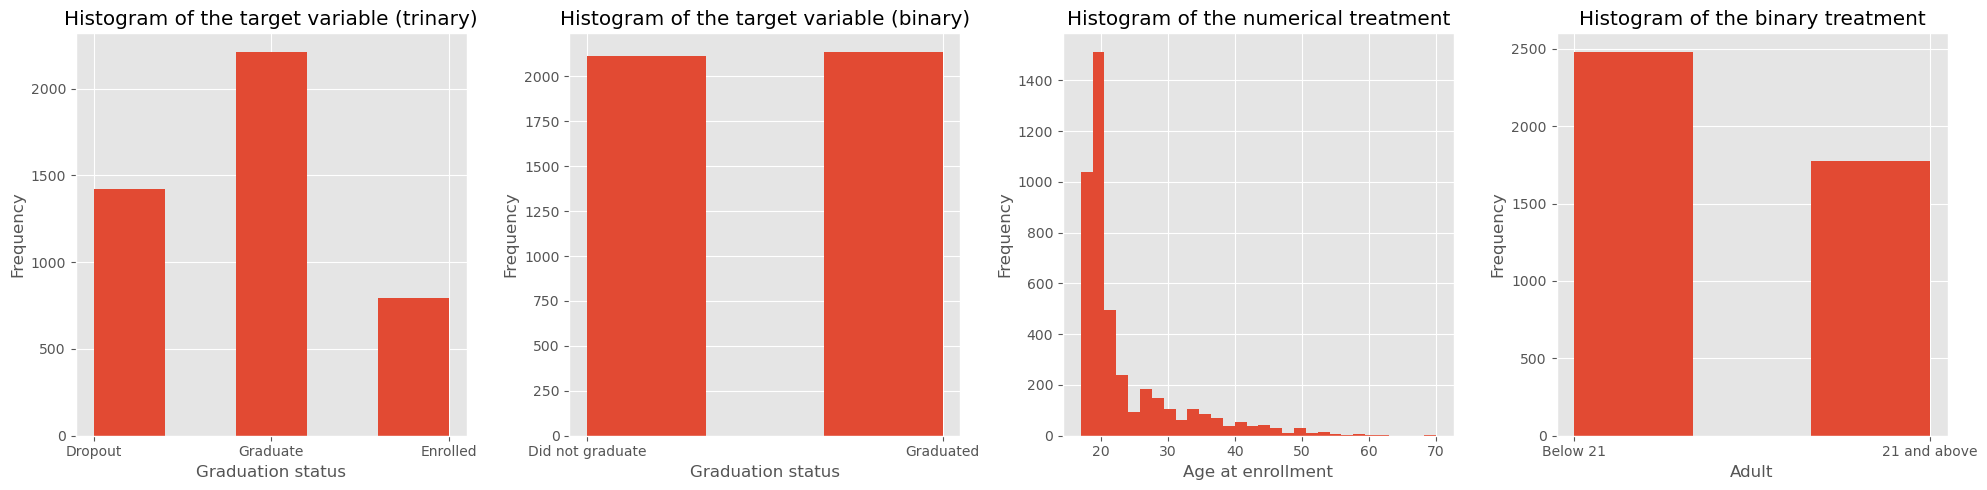

In [16]:

raw_data_df = pd.read_csv('data/raw_data.csv')
processed_data_df = pd.read_csv('data/processed_data.csv')

PREPROCESSED_TARGET_NAME = 'Target'
TARGET_VARIABLE_NAME = 'Target'
NUMERIC_TREATMENT_NAME = 'Age at enrollment'
BINARY_TREATMENT_NAME = 'Adult'

# plot 4 graphs side by side
# The first is the histogram of the target variable from the raw data
# The first is the histogram of the target variable from the processed data
# The second is the histogram of the numerical treatment from the raw data
# The third is the histogram of the binary treatment from the processed data

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# plot the histogram of the target variable from the raw data
axs[0].hist(raw_data_df[TARGET_VARIABLE_NAME], bins=5)
axs[0].set_title('Histogram of the target variable (trinary)')
axs[0].set_xlabel('Graduation status')
axs[0].set_ylabel('Frequency')

# plot the histogram of the target variable from the processed data
# The category of 0 should be renamed to 'Did not graduate' and the category of 1 should be renamed to 'Graduated'
axs[1].hist(processed_data_df[TARGET_VARIABLE_NAME], bins=3)
axs[1].set_title('Histogram of the target variable (binary)')
axs[1].set_xlabel('Graduation status')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Did not graduate', 'Graduated'])

# plot the histogram of the numerical treatment from the raw data
axs[2].hist(raw_data_df[NUMERIC_TREATMENT_NAME], bins=30)
axs[2].set_title('Histogram of the numerical treatment')
axs[2].set_xlabel('Age at enrollment')
axs[2].set_ylabel('Frequency')

# plot the histogram of the binary treatment from the processed data.
# The category of 0 should be renamed to ' Below 21' and the category of 1 should be renamed to '21 and above'
axs[3].hist(processed_data_df[BINARY_TREATMENT_NAME], bins=3)
axs[3].set_title('Histogram of the binary treatment')
axs[3].set_xlabel('Adult')
axs[3].set_ylabel('Frequency')
axs[3].set_xticks([0, 1])
axs[3].set_xticklabels(['Below 21', '21 and above'])

# save the plot
PLOTS_DIR = '/Users/gurkeinan/semester6/Causal-Inference/Project/plots'
plt.savefig(f'{PLOTS_DIR}/target_and_treatments_histograms')

plt.tight_layout()
plt.show()